# Analisi esplorativa bivariata
## Scaletta
- Analisi di una coppia di variabili categoriche:
  - Tabelle di contingenza
  - Frequenze assolute marginali
  - Frequenze relative marginali
  - Frequenze relative condizionate
- Analisi di una variabile categorica e una variabile numerica:
  - Istogrammi multipli
  - Boxplot raggruppati
- Analisi di due variabili numeriche:
  - Diagramma di dispersione (scatter plot)
  - Coefficiente di correlazione di Pearson

## Strumenti
Un ottimo strumento per fare questo tipo di analisi esplorativa in pandas sono i metodi groupby e pivot_table.
Vedi i relativi capitoli nel Python Data Science Handbook: [aggregation and grouping](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), [pivot tables](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html).

## Preparazione
Carichiamo il dataset della stralugano e creiamo alcune variabili categoriche con un supporto limitato

In [5]:
import numpy as np
np.set_printoptions(precision=2)
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
# Riutilizziamo il dataset della stralugano
df=pd.read_csv("data/stralugano.csv",
               keep_default_na=False)
df["tempo"] = df["ore"] * 60 + df["minuti"] + df["secondi"] / 60 + df["decimi"] / 60 / 10
df["anno"] = pd.to_numeric(
    df["anno"],
    errors="coerce" # mette a nan i valori che non riesce a convertire in numeri (quale?)
)
print("Lunghezza di df: ",len(df))
df = df.dropna(axis=0, subset=["anno"])
print("Lunghezza di df: ",len(df))

Lunghezza di df:  1242
Lunghezza di df:  1241


In [6]:
df

posto                nome    anno             provenienza  \
0         1  Engelhardt Adriano  1992.0                 Locarno   
1         2    Repetto Emanuele  1990.0          I-Camogli (GE)   
2         3         Huber Erich  1981.0             Rechthalten   
3         4        Buffa Nicola  1984.0          I-Vicenza (VI)   
4         5   Maffongelli Marco  1988.0               S. Pietro   
...     ...                 ...     ...                     ...   
1237   1238    Sartore Domenico  1966.0                   Claro   
1238   1239     Lesinigo Matteo  1984.0                   Porza   
1239   1240      Minola Stefano  1964.0  I-Olgiate Comasco (CO)   
1240   1241    Benini Gian Luca  1969.0                 Origlio   
1241   1242        Enne Silvano  1964.0                 Balerna   

                   squadra  ore  minuti  secondi  decimi      tempo  
0                             0      31       49       1  31.818333  
1         Delta Spedizioni    0      32       16       8  32.280000  
2                LAT Sense    0      33       25       5  33.425000  
3         VICENZA MARATHON    0      33       31       8  33.530000  
4                             0      34       29       4  34.490000  
...                    ...  ...     ...      ...     ...        ...  
1237  ZURIGO ASSICURAZIONI    1      23       25       6  83.426667  
1238                Avaloq    1      23       41       9  83.698333  
1239  IMPLENIA SVIZZERA SA    1      25       11       0  85.183333  
1240              UBS TEAM    1      25       29       1  85.485000  
1241              Comal.ch    1      26        5       5  86.091667  

[1241 rows x 10 columns]

In [7]:
set(df["provenienza"])

{'A-Rivera',
 'A-Wien',
 'Adliswil',
 'Agarone',
 'Agno',
 'Agra',
 'Airolo',
 'Aldesago',
 'Altdorf UR',
 'Anzonico',
 'Arbedo',
 'Arogno',
 'Arosio',
 'Arzo',
 'Augst BL',
 'Avry-sur-Matran',
 'Baar',
 'Balerna',
 'Banco',
 'Basel',
 'Bedano',
 'Bellinzona',
 'Bern',
 'Besazio',
 'Bever',
 'Biasca',
 'Biel/Bienne',
 'Bioggio',
 'Bissone',
 'Bosco Luganese',
 'Breganzona',
 'Brig',
 'Brione sopra Minusio',
 'Brissago',
 'Brusino Arsizio',
 'Brè sopra Lugano',
 'Buchrain',
 'Busswil BE',
 "COLLINA D'ORO",
 'Cademario',
 'Cadempino',
 'Cadenazzo',
 'Cadro',
 'Cagiallo',
 'Camignolo',
 'Camorino',
 'Campello',
 "Campione d'Italia",
 'Canobbio',
 'Carabbia',
 'Carona',
 'Carouge GE',
 'Caslano',
 "Cassina d'Agno",
 'Castagnola',
 'Castel San Pietro',
 'Castione',
 'Cavergno',
 'Chalais',
 'Cham',
 'Chambésy',
 'Chiasso',
 'Chur',
 'Cimo',
 'Claro',
 'Coldrerio',
 'Collombey',
 'Comano',
 'Contone',
 'Contra',
 'Cornaux NE',
 'Corteglia',
 'Cresciano',
 'Cressier FR',
 'Cressier NE',
 'Cug

Creiamo una colonna che raggruppa gli utenti in tre gruppi: chi viene da Lugano, chi viene dall'Italia e gli altri

In [8]:
df["prov"] = "Altro"
df.loc[df["provenienza"]=="Lugano", "prov"] = "Lugano"
mask_italiani = df["provenienza"].str.startswith("I-")
df.loc[mask_italiani, "prov"] = "Italia"

In [9]:
# Analizziamo l'attributo "provenienza"
px.histogram(df, orientation='h', y="prov")

In [10]:
# Raggruppiamo le categorie per l'attributo "squadra"
df["sq"] = "Con squadra"
df.loc[df["squadra"] == "", "sq"] = "Indipendente"
df["sq"]

0       Indipendente
1        Con squadra
2        Con squadra
3        Con squadra
4       Indipendente
            ...     
1237     Con squadra
1238     Con squadra
1239     Con squadra
1240     Con squadra
1241     Con squadra
Name: sq, Length: 1241, dtype: object

In [11]:
px.histogram(df, x="sq")

In [12]:
# Dividiamo i corridori in tre gruppi a seconda del tempo

In [13]:
df["bravura"] = "scarso"
df.loc[df["tempo"]<60, "bravura"] = "medio"
df.loc[df["tempo"]<50, "bravura"] = "veloce"
px.histogram(df, x="bravura")

## Notazione
Consideriamo due variabili $\boldsymbol{a}_j$ e $\boldsymbol{a}_k$.  Abbiamo $m$ osservazioni.
- $\boldsymbol{a}_j = (x_{1j}, x_{2j}, \ldots, x_{mj})$
- $\boldsymbol{a}_k = (x_{1k}, x_{2k}, \ldots, x_{mk})$

Il primo indice di $x$ corrisponde all'osservazione (da $1$ a $m$). Il secondo indice all'attributo ($j$ oppure $k$).

## Due variabili categoriche
Definiamo con $V$ e $U$ il supporto di $\boldsymbol{a}_j$ e $\boldsymbol{a}_k$, rispettivamente (v. lezione sull'analisi univariata).
- $V = \{v_1, v_2, \ldots, v_J\}$
- $U = \{u_1, u_2, \ldots, u_K\}$

Essi hanno rispettivamente cardinalita' $J$ e $K$.

In [14]:
aj = df["prov"]
ak = df["sq"]
V = np.unique(aj)
J = len(V)
U = np.unique(ak)
K = len(U)
print(f"V = {V}")
print(f"U = {U}")

V = ['Altro' 'Italia' 'Lugano']
U = ['Con squadra' 'Indipendente']


### Tabella di contingenza

È possibile costruire una tabella di contingenza, costituita da una matrice $T$ con $J$ righe e $K$ colonne, i cui elementi $t_{rs}$ indicano il numero di osservazioni per cui vale che:
$$x_{ij} = v_r$$
$$x_{ik} = u_s$$.

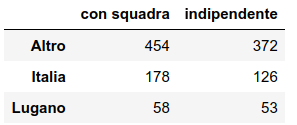

In [15]:
# Calcolo la tabella di contingenza a mano
t = np.full((len(V),len(U)), np.nan, dtype=int)
for r in range(len(V)):
    for s in range(len(U)):
        t[r,s] = np.sum((aj==V[r]) & (ak==U[s]))
        print(f"{V[r]:8} {U[s]:12}: {t[r,s]}")
        
t

Altro    Con squadra : 454
Altro    Indipendente: 372
Italia   Con squadra : 178
Italia   Indipendente: 126
Lugano   Con squadra : 58
Lugano   Indipendente: 53


array([[454, 372],
       [178, 126],
       [ 58,  53]])

In [16]:
# Creo un dataframe solo per stampare la tabella
pd.DataFrame(t, # dati
             index=V, # intestazioni di riga
             columns=U) # intestazioni di colonna

Con squadra  Indipendente
Altro           454           372
Italia          178           126
Lugano           58            53

In [17]:
# Calcolo della tabella di contingenza direttamente con pandas
df.groupby(["prov","sq"]).size().unstack()

sq      Con squadra  Indipendente
prov                             
Altro           454           372
Italia          178           126
Lugano           58            53

In [18]:
# Istogramma creato direttamente con plotly
fig = px.histogram(df, orientation="h", y="prov", color="sq", barmode="group")
# labels={"prov":"Provenienza","sq":"Squadra"}

# Facciamo override delle etichette...
fig.layout["xaxis"]["title"] = "Numero di corridori"
fig.layout["yaxis"]["title"] = "Provenienza"
fig.layout["legend"]["title"]["text"] = "Squadra"
fig

#### Esercizio
Ricrea questa rappresentazione a barre della tabella di contingenza dal dataset dei profili

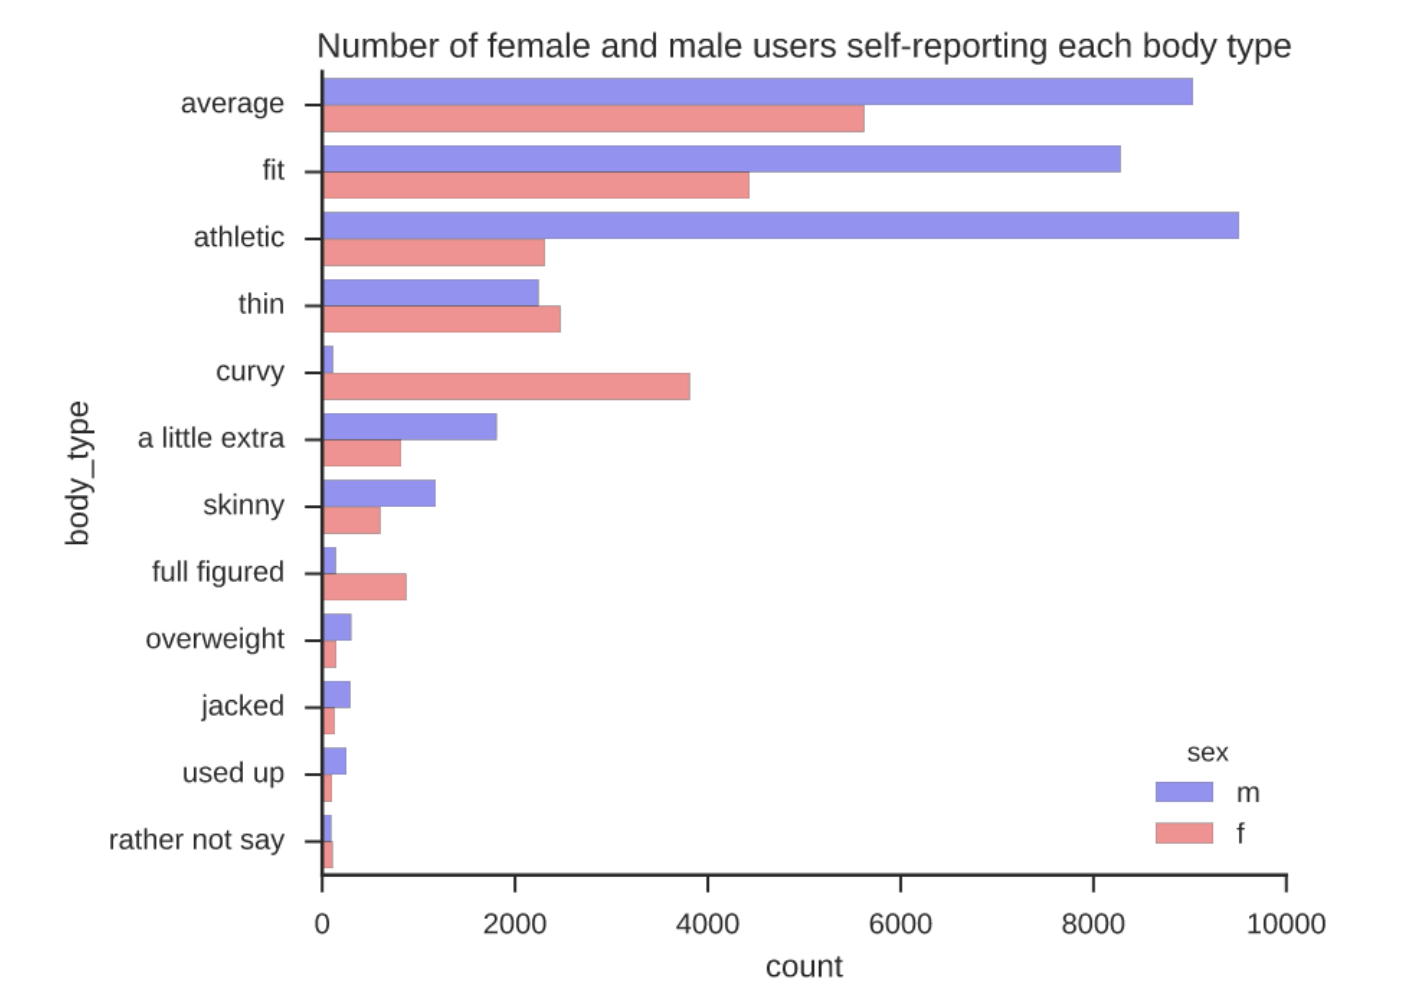

In [19]:
# Soluzione
df2=pd.read_csv("data/profiles_revised.csv")
df2=df2.dropna()
df2

age       body_type               diet      drinks      drugs  \
0       22  a little extra  strictly anything    socially      never   
1       36         average       mostly other       often  sometimes   
7       30         average    mostly anything    socially      never   
14      29            thin    mostly anything    socially      never   
19      34        athletic    mostly anything    socially      never   
...    ...             ...                ...         ...        ...   
59904   32  a little extra       mostly other  not at all      never   
59907   25          skinny           anything    socially  sometimes   
59913   29    full figured    mostly anything    socially      never   
59942   24             fit    mostly anything       often  sometimes   
59944   26        athletic    mostly anything    socially      often   

                               education                ethnicity  height  \
0          working on college/university             asian, white    75.0   
1                  working on space camp                    white    70.0   
7      graduated from college/university                    white    65.0   
14         working on college/university  hispanic / latin, white    62.0   
19        graduated from masters program                    white    72.0   
...                                  ...                      ...     ...   
59904    graduated from two-year college                    white    66.0   
59907  graduated from college/university                    white    72.0   
59913  graduated from college/university                    black    64.0   
59942      working on college/university             white, other    72.0   
59944      working on college/university             asian, black    73.0   

       income                           job  \
0          -1                transportation   
1       80000          hospitality / travel   
7          -1   artistic / musical / writer   
14      50000                         other   
19         -1  science / tech / engineering   
...       ...                           ...   
59904      -1     clerical / administrative   
59907   20000   artistic / musical / writer   
59913      -1        executive / management   
59942      -1         entertainment / media   
59944      -1             medicine / health   

                                          offspring orientation  \
0      doesn&rsquo;t have kids, but might want them    straight   
1      doesn&rsquo;t have kids, but might want them    straight   
7           doesn&rsquo;t have kids, but wants them    straight   
14          doesn&rsquo;t have kids, but wants them    straight   
19                          doesn&rsquo;t have kids    straight   
...                                             ...         ...   
59904                                      has kids    straight   
59907                       doesn&rsquo;t have kids    straight   
59913                       doesn&rsquo;t have kids    straight   
59942                       doesn&rsquo;t have kids    straight   
59944       doesn&rsquo;t have kids, but wants them    straight   

                            pets                                  religion  \
0      likes dogs and likes cats     agnosticism and very serious about it   
1      likes dogs and likes cats  agnosticism but not too serious about it   
7      likes dogs and likes cats                              christianity   
14       likes dogs and has cats                               catholicism   
19     likes dogs and likes cats  catholicism but not too serious about it   
...                          ...                                       ...   
59904                 likes cats           other and very serious about it   
59907                 likes dogs     atheism and somewhat serious about it   
59913  likes dogs and likes cats         agnosticism and laughing about it   
59942  likes dogs and likes cats                               agno

In [20]:
df2.groupby(["job","sex"]).size()
fx=px.histogram(df2,orientation="h",y="job",color="sex",barmode="stack",barnorm="percent")
fx.layout["yaxis"]["title"]="Job"
fx.layout["xaxis"]["title"]="%"
fx.layout["legend"]["title"]["text"]="Sex"
fx

In [21]:

df2.groupby(["body_type","sex"]).size()

fx=px.histogram(df2,orientation="h",y="body_type",color="sex",barmode="group").update_layout(yaxis_categoryorder = 'total ascending')
fx.layout["yaxis"]["title"]="body type"
fx.layout["xaxis"]["title"]="Count"
fx.layout["legend"]["title"]["text"]="Sex"
fx

### Frequenze assolute marginali
È possibile calcolare la somma dei valori per ogni riga e per ogni colonna ottenendo le
frequenze assolute marginali:
$$f_r = \sum_{s=1}^{K} t_{rs}$$
$$g_s = \sum_{r=1}^{J} t_{rs}$$

In [22]:
f = np.sum(t, axis=1)
# somma lungo il secondo asse (ovvero le colonne): 
# ottieni un elemento per ogni riga

g = np.sum(t, axis=0) # somma lungo il primo asse (le righe): ottieni un elemento per colonna

print(f"Frequenze assolute marginali per riga: {f}")
print(f"Frequenze assolute marginali per colonna: {g}")

Frequenze assolute marginali per riga: [826 304 111]
Frequenze assolute marginali per colonna: [690 551]


In [23]:
# Equivalente con pandas
print(df.groupby("sq").size())
print()
print(df.groupby("prov").size())

sq
Con squadra     690
Indipendente    551
dtype: int64

prov
Altro     826
Italia    304
Lugano    111
dtype: int64


### Frequenze relative marginali
Dividendo per il numero totale di osservazioni $m$ otteniamo le frequenze relative marginali

### Frequenze relative condizionate
Dividendo un valore nella tabella di contingenza per la corrispondente frequenza assoluta marginale, otteniamo le frequenze relative condizionate

### Esempio di implementazione direttamente con numpy

In [24]:
print(t)
f = np.sum(t, axis=1) # somma di ogni riga
g = np.sum(t, axis=0) # somma di ogni colonna
print()
print(f)

[[454 372]
 [178 126]
 [ 58  53]]

[826 304 111]


In [25]:
t_cond_rows = np.full(t.shape, np.nan)
for r in range(t.shape[0]): # per ogni riga (indice r)
    for s in range(t.shape[1]): # per ogni colonna (indice s)
        t_cond_rows[r,s] = t[r,s] / f[r]
pd.DataFrame(t_cond_rows, index=V, columns=U)


Con squadra  Indipendente
Altro      0.549637      0.450363
Italia     0.585526      0.414474
Lugano     0.522523      0.477477

In [26]:
# La stessa cosa, ma meglio

# somma di ogni riga, ma ottenendo un array che mantiene il numero di dimensioni di t
f = np.sum(t, axis=1, keepdims=True)
print(f)
print()


# np.tile affianca una matrice a se stessa, come fossero piastrelle (tiles)
f_tiled = np.tile(f, 
    (1,  # Ripetila una sola volta lungo il primo asse (righe) 
     2)  # Ripetila 2 volte lungo il secondo asse (colonne)
)
print(f_tiled)
print(f_tiled.shape)
print(t.shape)

print(t / f_tiled)

[[826]
 [304]
 [111]]

[[826 826]
 [304 304]
 [111 111]]
(3, 2)
(3, 2)
[[0.55 0.45]
 [0.59 0.41]
 [0.52 0.48]]


In [27]:
# Sorpresa: np.tile non era neanche indispensabile
t_cond_rows = t / f # (3 righe 2 colonne) / (3 righe 1 colonna)
print(t_cond_rows)  # Funziona!

[[0.55 0.45]
 [0.59 0.41]
 [0.52 0.48]]


L'ultima cella sopra usa una funzionalita' piuttosto avanzata di numpy, nota come *broadcasting*. [Qui](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html) viene spiegato nel dettaglio come funziona.

Utilizziamo questa questa funzionalita' senza accorgercene quando moltiplichiamo un array per uno scalare: lo scalare viene "esteso" alla dimensione dell'array prima della moltiplicazione.  Nel caso della cella sopra, l'array `f` (3 righe 1 colonna) viene automaticamente esteso alla dimensione dell'array `t` (3 righe 2 colonne) facendo implicitamente un'operazione simile a quella implementata da `np.tile`.

Per il corso, non faremo uso del broadcasting molto frequentemente, se non per operazioni tra array e scalari.

## Una variabile numerica, una categorica
Posso raggruppare le mie osservazioni in piu' gruppi a seconda del valore della variabile categorica.  Se la variabile categorica ha un supporto di cardinalita' $K$, questo identifica $K$ sottoinsiemi per la variabile numerica.  Su ciascun sottoinsieme posso fare tutte le analisi che abbiamo visto nella lezione sull'analisi univariata.  Ad esempio, posso comprararne la distribuzione utilizzando statistiche o grafici.  

In [28]:
num = df["tempo"] # variabile numerica
cat = df["prov"] # variabile categorica

support = np.unique(cat)
for val in support: # per ogni valore che puo' predere la variabile categorica
    num_g = num[cat == val] # tempi per le osservazioni corrispondenti
    print(f"I corridori per cui cat = {val} hanno un tempo medio di {np.mean(num_g):.2f} minuti")

I corridori per cui cat = Altro hanno un tempo medio di 53.20 minuti
I corridori per cui cat = Italia hanno un tempo medio di 53.88 minuti
I corridori per cui cat = Lugano hanno un tempo medio di 54.27 minuti


In [29]:
# Lo stesso in pandas
df.groupby("prov")["tempo"].mean()

prov
Altro     53.201378
Italia    53.884117
Lugano    54.273198
Name: tempo, dtype: float64

In [30]:
px.histogram(df, x="tempo", color="prov", barmode="overlay")

In [31]:
px.box(df, orientation="h", y="prov", x="tempo", color="sq")

#### Esercizio
considera il dataset dei profili e, usando plotly, genera delle rappresentazioni per rispondere alle seguenti domande:
- Confronta la distribuzione dell'eta' di maschi e femmine
- Confronta la distribuzione dell'altezza di maschi e femmine
- Confronta la distribuzione dell'eta' di persone che sono vegetariane o vegane, rispetto agli onnivori
- Confronta la distribuzione dell'eta' delle persone in funzione del loro lavoro

Utilizza dove lo ritieni piu' appropriato degli istogrammi oppure dei boxplot.

In [32]:
# Soluzione


## Due variabili numeriche
### Diagramma di dispersione (scatter plot)
Uno scatter plot è la rappresentazione grafica più intuitiva del legame esistente tra due attributi numerici.

In [33]:
df["eta"] = 2016 - df["anno"]

In [34]:
px.scatter(df, x="eta", y="tempo")

### Indici di associazione
#### Covarianza
$$\operatorname{Cov}(\boldsymbol{a}_j, \boldsymbol{a}_k) = \frac{1}{m}\sum_{i=1}^{m}(x_{ij}-\bar{x}_j)(x_{ik}-\bar{x}_k)$$

In [35]:
cov = np.mean((df["eta"] - df["eta"].mean()) * (df["tempo"] - df["tempo"].mean()))
print(cov)

# Oppure np.cov (usa un modo leggermente diverso per il calcolo)
print(np.cov(df["eta"],df["tempo"])[0,1])

16.58316006430832
16.5965335804892


#### Coefficiente di correlazione
$$r^{jk} = \operatorname{Cor}(\boldsymbol{a}_j, \boldsymbol{a}_k) = \frac{\operatorname{Cov}(\boldsymbol{a}_j, \boldsymbol{a}_k)}{\sigma_j \sigma_k}$$

Dove $\sigma_j$ e' la deviazione standard della variabile $\boldsymbol{a}_j$, e $\sigma_k$ e' la deviazione standard della variabile $\boldsymbol{a}_k$.

In [36]:
print(np.corrcoef(df["eta"], df["tempo"])[0,1])

0.16618893847681537


Cosa significa il coefficiente di correlazione?
- $r^{jk} = +1$ indica che c’e’ una relazione lineare perfetta tra le due variabili $\boldsymbol{a}_j$ e $\boldsymbol{a}_k$.  All’aumentare dell’una, aumenta anche l’altra di una quantita’ proporzionale.
- $r^{jk} = -1$ indica una relazione lineare perfetta in cui all’aumentare di una variabile l’altra
diminuisce.
- $0$ indica che non esiste una relazione lineare tra le due variabili.

il coefficiente di correlazione e’ adimensionale

il coefficiente di correlazione e’ simmetrico: $r^{jk} = r^{jk}$

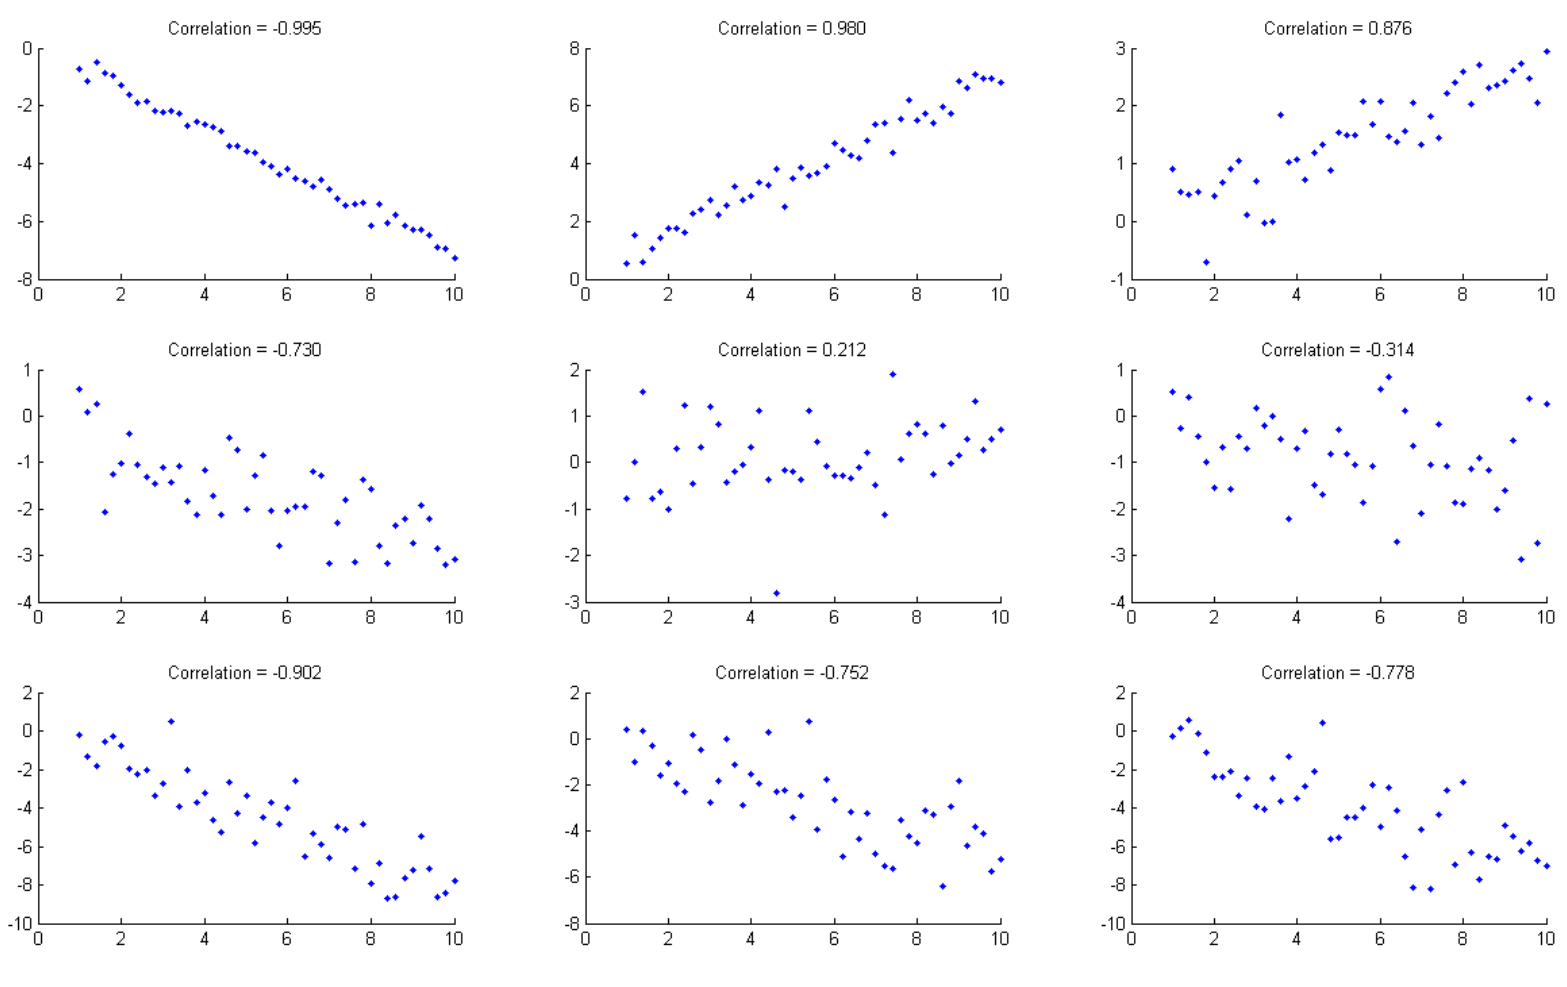

#### Costruiamoci un' intuizione sul significato del coefficiente di correlazione
http://guessthecorrelation.com/

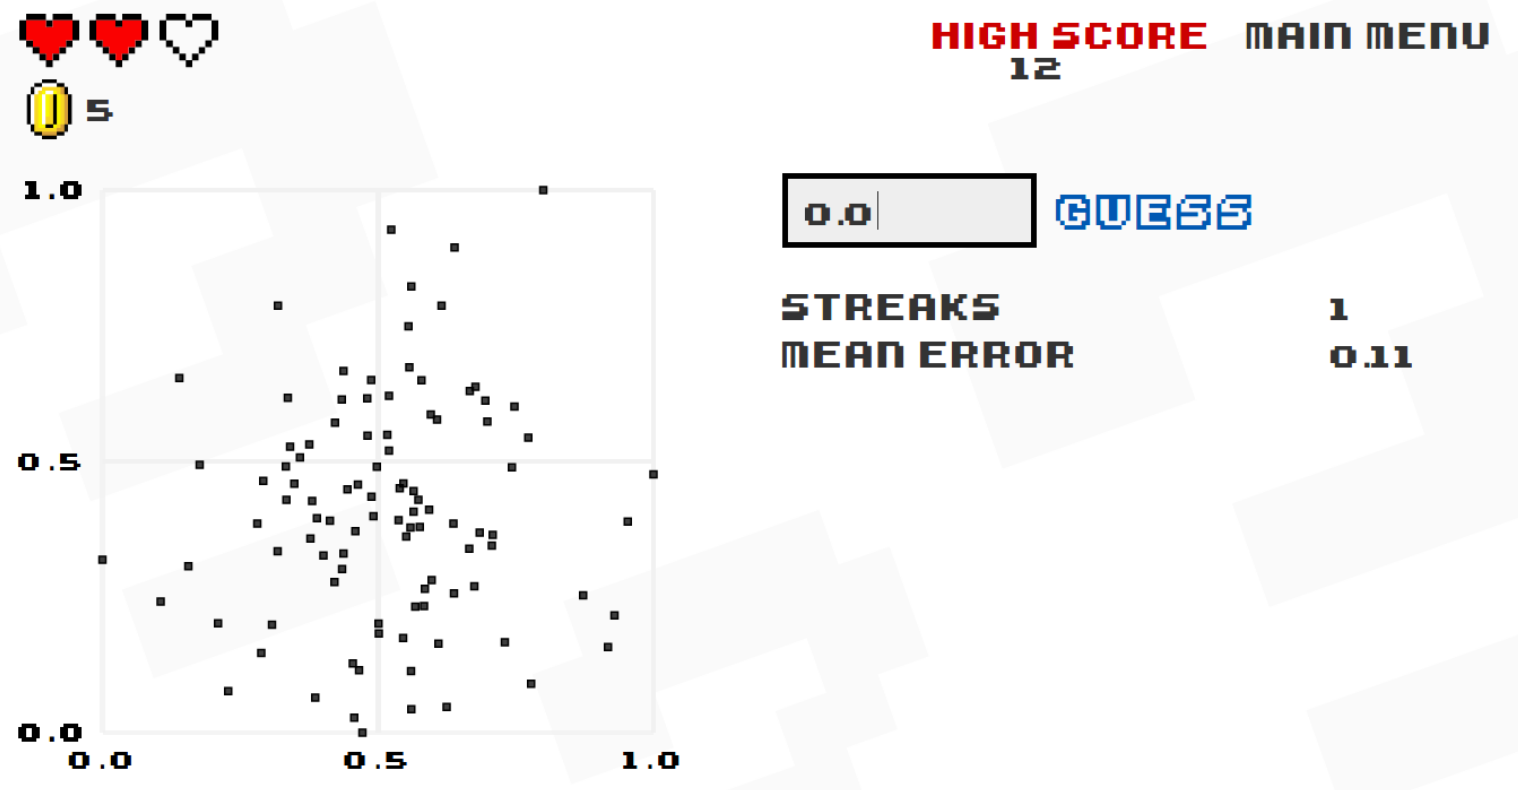

#### Coefficiente di correlazione: caveat importanti
Il coefficiente di correlazione **non dipende dalla pendenza della retta**!

Un coefficiente pari a 0 **non implica che le due variabili non sono correlate**, ma solo che non sono correlate **in modo lineare**.  Potrebbero essere correlate ma in modo non lineare!
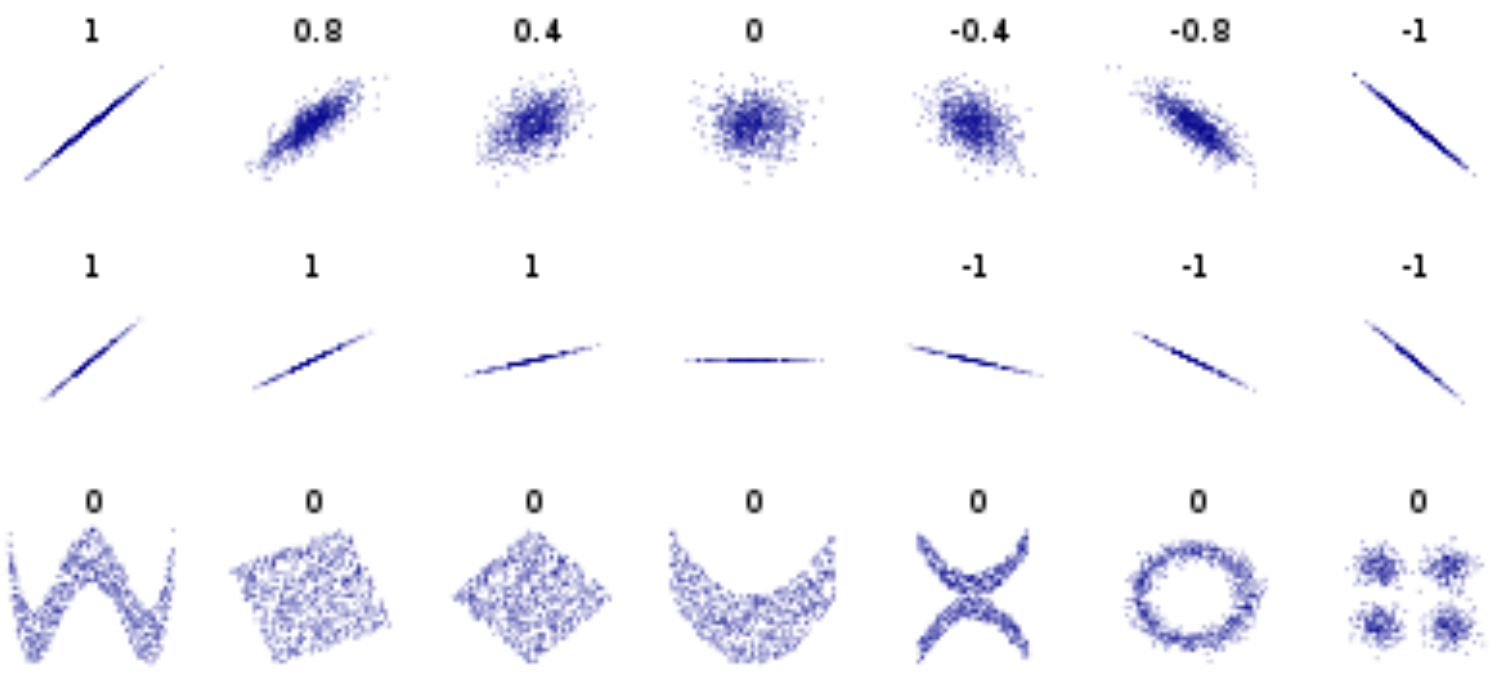

Quattro dataset con lo stesso coefficiente di correlazione: 0.816

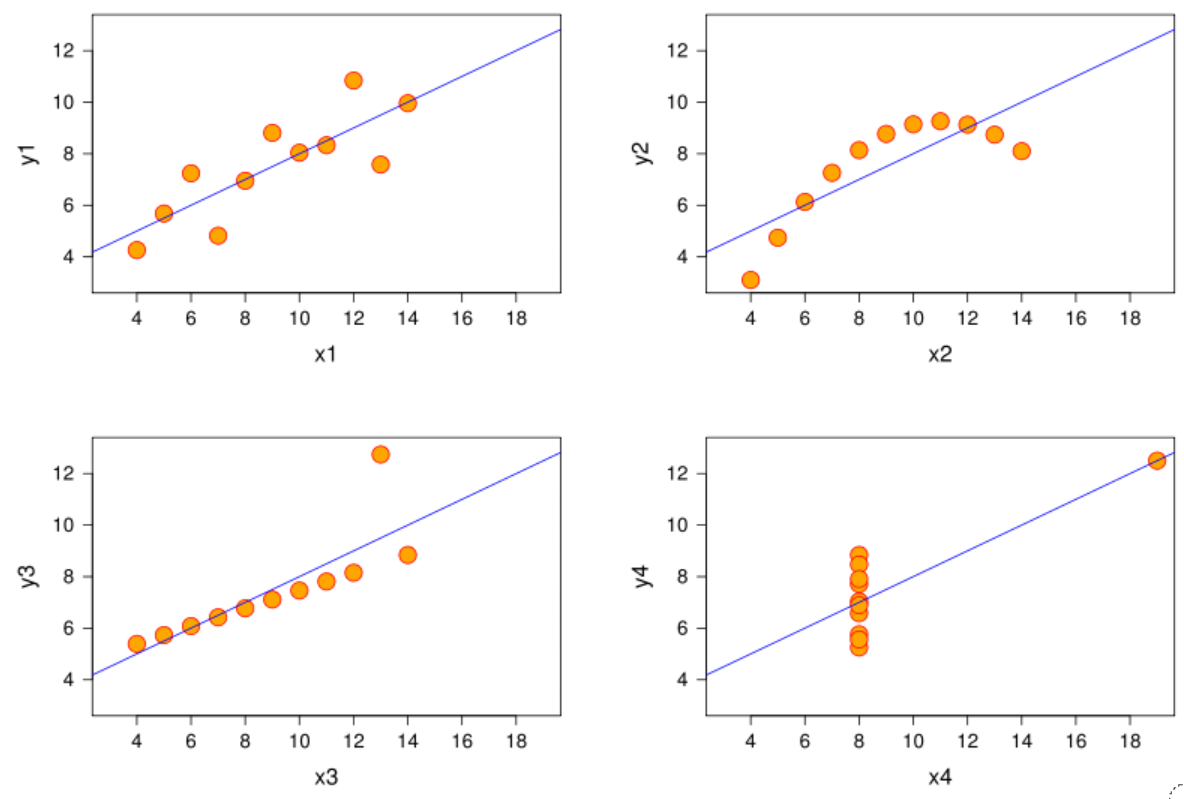

Il coefficiente di correlazione misura solo correlazione lineare, non ci dice nulla su relazioni piu’ complesse
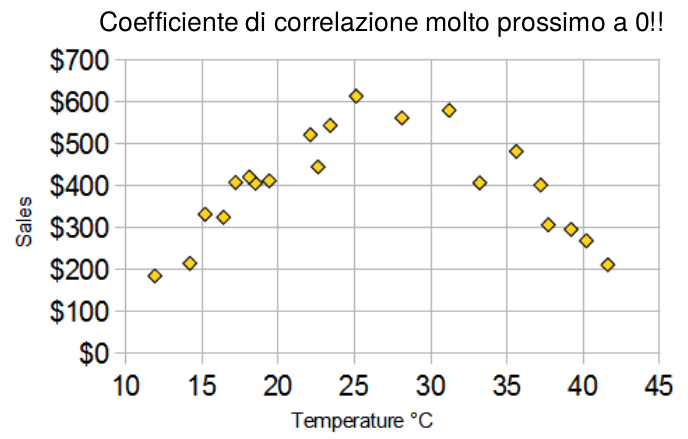

Il coefficiente di correlazione non indica necessariamente un rapporto di causa-effetto!
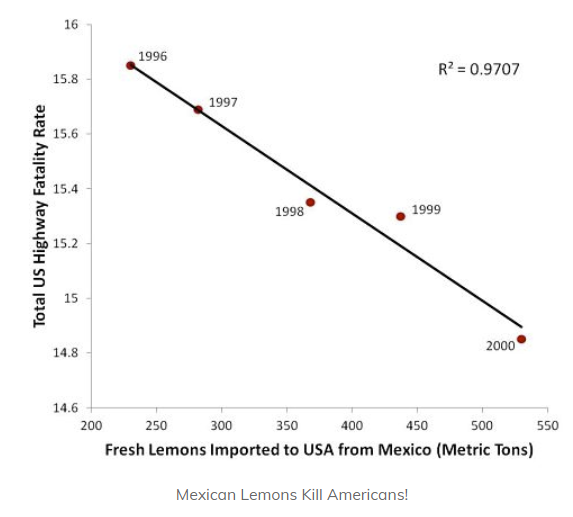

Altre correlazioni spurie:

http://www.tylervigen.com/spurious-correlations
(Attenzione: questi plot NON sono scatter plot!)

### Approfondimento
scatter plot, density plot, marginal histograms
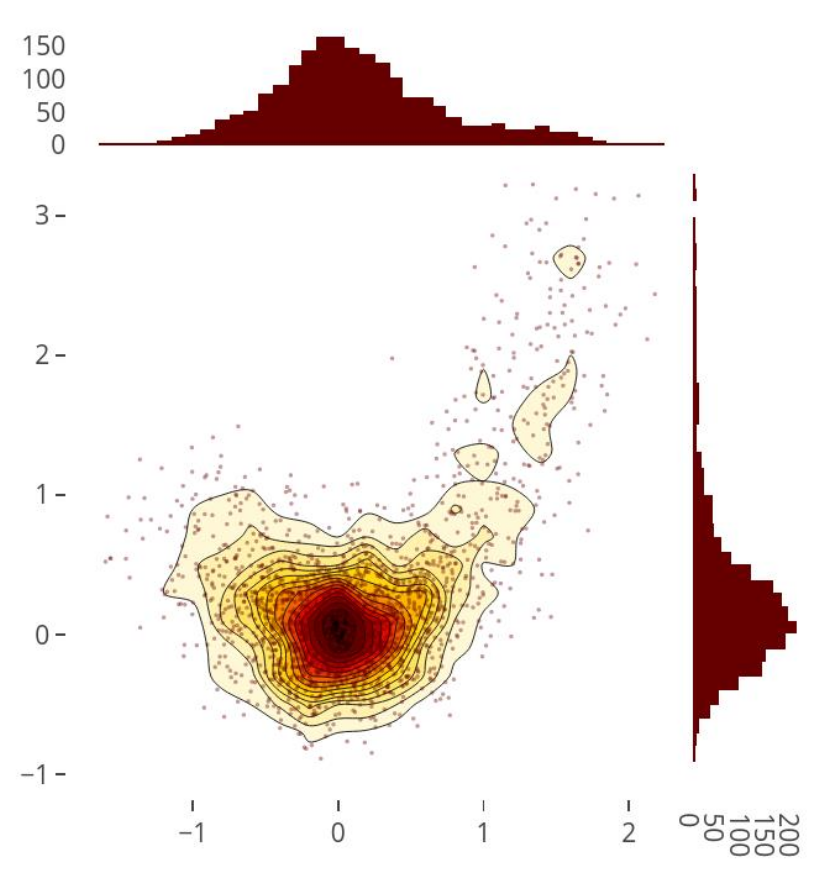